In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 32.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=ad10

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [4]:
#Tokenizer
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

#for Train Set
for i in range(0,trainSet.shape[0]):
    text = bnltk.word_tokenize(trainSet['Data'][i])
    trainSet['Data'][i] = text
#For Test Set   
for i in range(0,testSet.shape[0]):
    text = bnltk.word_tokenize(testSet['Data'][i])
    testSet['Data'][i] = text

In [5]:
!pip install BnLemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.5 MB/s eta 0:00:00


In [6]:
from bnlp import BengaliCorpus as corpus

# print(corpus.stopwords)
# print(corpus.punctuations)
# print(corpus.letters)
# print(corpus.digits)
# print(corpus.vowels)

stop_words = set(corpus.stopwords)


for i in range(0,trainSet.shape[0]):
    words = trainSet['Data'][i]
    trainSet['Data'][i] =  str([word for word in words if word.lower() not in stop_words])
    

In [7]:
# stop_words = set(corpus.stopwords)


for i in range(0,testSet.shape[0]):
    words = testSet['Data'][i]
    testSet['Data'][i] =  str([word for word in words if word.lower() not in stop_words])

In [8]:
trainSet.head()

,Data,Label
0,"['মুগ্ধ', 'হয়ে', 'গেলাম', 'মামু.', 'তোমায়', 'ক...",1
1,"['কুত্তার', 'বাচ্চাদের', 'দেশটা', 'অবস্তায়', '...",2
2,"['ভাই', 'কথাই', 'যাদু', 'রয়েছে']",1
3,"['উওরটা', 'ভাল', 'লেগেছে']",1
4,"['গাড়ী', 'সাজেক', 'পারবো', '?', 'প্রাইভেট', '...",0


In [9]:
testSet.head()

,Data,Label
0,"['স্বাস্থ্যবান', 'চাই', ',', 'বয়সের', 'তুলনায়'...",0
1,"['ভাইয়া', 'ভিডিও', 'আসে']",0
2,"['সৌরভ', 'গাঙ্গুলী', 'ছাড়া', 'দাদাগিরি', 'কখনো...",0
3,"['ক্রিকেট', 'বাচাতে', 'পাপকে', 'অতিশিগ্রিই', '...",2
4,"['আমিতো', 'ঝালপ্রিয়ো', 'মানুষ']",1


In [10]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [11]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [12]:
X_train

["['মুগ্ধ', 'হয়ে', 'গেলাম', 'মামু.', 'তোমায়', 'কমু.', 'বলো', 'তোমায়', 'কোথায়', 'পামু.', 'সাথে', 'যাবু.', 'গান', 'কমু', 'গলি', 'ঘুরমু.']",
 "['কুত্তার', 'বাচ্চাদের', 'দেশটা', 'অবস্তায়', 'তিনটা', 'পুলিশ', 'তরে', 'মেরে', 'পেলা', 'দরকার']",
 "['ভাই', 'কথাই', 'যাদু', 'রয়েছে']",
 "['উওরটা', 'ভাল', 'লেগেছে']",
 "['গাড়ী', 'সাজেক', 'পারবো', '?', 'প্রাইভেট', 'কার', '?']",
 "[':', 'পরীক্ষার', 'রেজাল্টের', 'সময়', ',', 'ব্যানিজ্যিক', 'প্রচার']",
 "['বিশ্বনন্দিত', 'বিশ্ব', 'জয়', 'ইসলামের', 'পাখিদের', 'কোরআনের', 'পাখিদের', 'খবর', 'আরিফ', 'অব্যয়', 'বোদার', 'বয়', 'সিঙ্গেল', 'বয়', 'জাতি', 'হিসেবে', 'বাঙালি', 'বর্তমানে', 'মুরুক্ষ', 'তারই', 'প্রমাণ', 'ঝাড়ু', 'মার', 'তোর', 'কপালে']",
 "['সাপ্তাহিক', 'মুসুল্লিদের', 'কথাটাও', 'ধরলে', 'ভাই', ',', 'চোখ', 'খুলে', 'দিছো']",
 "['ভেবেছিলাম', 'গালিগালাজ', 'সেরা', 'ছেলে', '?', 'গালিবয়']",
 "['রেপারই', 'হও', ',', 'ডাক্তার', 'হওয়ার', 'দরকার']",
 "['লেসবো', 'মেয়েটার', 'ফ্রেন্ড', 'টা', 'কিউট']",
 "['আচ্ছা', 'চারপাশে', 'অন্ধকার', '?', 'লাইট', 'টা', 'আপনাদের', 'টেব

In [13]:
X_test

["['স্বাস্থ্যবান', 'চাই', ',', 'বয়সের', 'তুলনায়', 'চিকন', '।', 'একটু', 'পরামর্শ']",
 "['ভাইয়া', 'ভিডিও', 'আসে']",
 "['সৌরভ', 'গাঙ্গুলী', 'ছাড়া', 'দাদাগিরি', 'কখনো', 'জমে', 'উঠত']",
 "['ক্রিকেট', 'বাচাতে', 'পাপকে', 'অতিশিগ্রিই', 'তাকেও', 'গ্রেফতার', 'হিসাব', ',', '100', '%', 'বড়', 'দূর্নিতীবাজ']",
 "['আমিতো', 'ঝালপ্রিয়ো', 'মানুষ']",
 "['টেকনিশিয়ান', 'রা', 'খাবার', 'খাইয়ে', 'হজম', 'করিয়ে', 'দিবে', 'আদনান', 'ভায়']",
 "['ইউনিভার্সিটিতে', 'চেয়ে', 'ভয়াবহ', 'অবস্থা', '।', 'একজন', 'ভিক্টিম', '।', 'খোজ', 'দেখেন']",
 "['অভাবে', 'আসলে', 'সরকারের', 'উচিৎ', 'ভালো', 'পদক্ষেপ', 'নেয়া']",
 "['এরকম', 'অত্যাচার', 'বুয়েট', 'প্রসাশনের', 'দূর্বলতা']",
 "['দরলাম', 'ভালো', 'পুলিশ', 'টা', 'ভালো', 'কিন্তুু', 'বাঙালিরা', 'পাই', 'ঘাটা', 'ঘাটি', 'গন্ধ', 'বের', 'বিপরীত', 'ভাইরাল', 'বাঙালি', 'আজব', 'মানুষ']",
 "['পছন্দ', 'সাদা', 'ভা', 'গরুর', 'মাংস']",
 "['ভাইয়া', 'মুন্সিগঞ্জ', 'বিক্রমপুরে', 'যাবেন', '।', 'ঐতিহ্যবাহী', 'খাবার', 'রেস্তোরাঁ', '।', 'অবশ্যই', 'পাবেন']",
 "['#', 'জনাব_ইসমাইল_চৌধুরী_সম্রাট', 'ভাইয়ের', '

In [14]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [15]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [16]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 31


In [17]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 969s 753ms/step - loss: 1.0043 - accuracy: 0.5014 - val_loss: 0.8966 - val_accuracy: 0.5927
Epoch 2/10
1258/1258 [==============================] - 942s 748ms/step - loss: 0.9010 - accuracy: 0.5843 - val_loss: 0.8490 - val_accuracy: 0.6211
Epoch 3/10
1258/1258 [==============================] - 941s 748ms/step - loss: 0.8474 - accuracy: 0.6170 - val_loss: 0.8460 - val_accuracy: 0.6311
Epoch 4/10
1258/1258 [==============================] - 940s 747ms/step - loss: 0.7888 - accuracy: 0.6526 - val_loss: 0.7933 - val_accuracy: 0.6589
Epoch 5/10
1258/1258 [==============================] - 941s 748ms/step - loss: 0.7733 - accuracy: 0.6590 - val_loss: 0.8245 - val_accuracy: 0.6141
Epoch 6/10
1258/1258 [==============================] - 941s 748ms/step - loss: 0.7111 - accuracy: 0.6894 - val_loss: 0.7640 - val_accuracy: 0.6892
Epoch 7/10
1258/1258 [===========================

In [18]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 18s 309ms/step
              precision    recall  f1-score   support

           0       0.45      0.42      0.44       361
           1       0.74      0.74      0.74       654
           2       0.72      0.76      0.74       571

    accuracy                           0.67      1586
   macro avg       0.64      0.64      0.64      1586
weighted avg       0.67      0.67      0.67      1586



array([[152, 111,  98],
       [105, 482,  67],
       [ 78,  61, 432]])

In [19]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

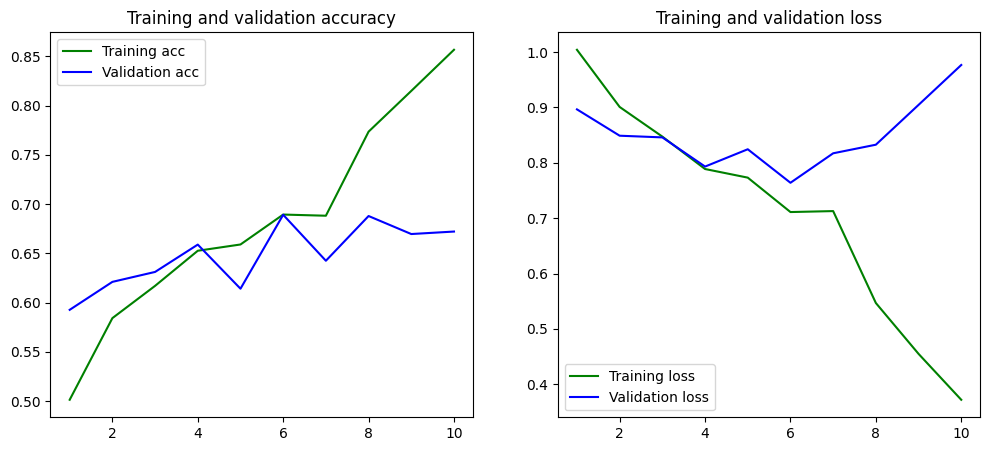

In [20]:
PlotGraph(history)